# Hypothesis Testing in Healthcare: Drug Safety

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda)

First, we needed to to visualize the number of adverse effects in the Drug and Placebo groups, saving it as a variable called plot_num_eff. I used counttplot from seaborn to show the no. of adverse effects 

Text(0.5, 1.0, 'Distribution of the Number of Adverse Effects between the Groups')

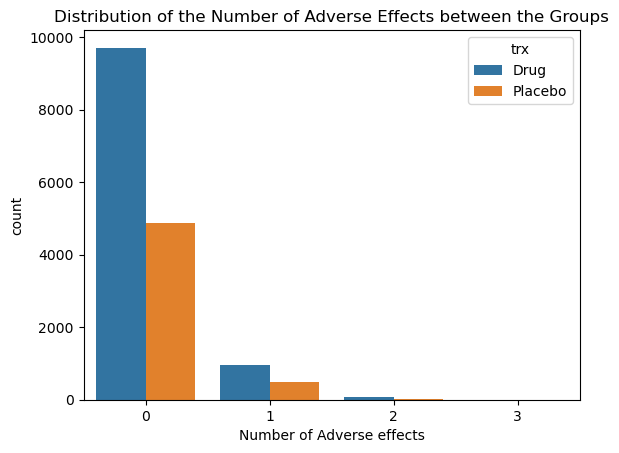

In [35]:
# Import packages
import numpy as np
import pandas as pd
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")


plot_num_eff=sns.countplot(x='num_effects', data=drug_safety,  hue='trx')
plt.xlabel("Number of Adverse effects")
plt.title("Distribution of the Number of Adverse Effects between the Groups")


As we can see the number of adverse effects between 2 groups are not different except for cases when there were 1 or 2 adverse effects. The number of participants with 1 adverse effect was more for the Drug group than Placebo group. 

In [11]:
print(drug_safety.head())
drug_safety['num_effects'].value_counts()

   age   sex   trx  week  wbc  rbc adverse_effects  num_effects
0   62  male  Drug     0  7.3  5.1              No            0
1   62  male  Drug     1  NaN  NaN              No            0
2   62  male  Drug    12  5.6  5.0              No            0
3   62  male  Drug    16  NaN  NaN              No            0
4   62  male  Drug     2  6.6  5.1              No            0


0    14567
1     1442
2       88
3        6
Name: num_effects, dtype: int64

## Checkeing whether the differece in adverse effects is significant between the groups 
- H0: There is no significant difference in the proportion of adverse effects between the groups
- H1: There is a significant difference in the proportion of adverse effects between the groups
Now, to check whether this difference is significant or not, we conduct a two-sample z-test. This two-sample z-test helps to determine if the proportion of adverse effects differs significantly between the Drug and Place groups. We use proportion_ztest() and save the results as two_samp_z_test & two_samp_z_p_value(), rounding it to 3 decimal places. 

In [15]:
# First, we count the adverse_effects column values for each trx group
adv_eff_by_trx = drug_safety.groupby("trx").adverse_effects.value_counts()
print(adv_eff_by_trx)

trx      adverse_effects
Drug     No                 9703
         Yes                1024
Placebo  No                 4864
         Yes                 512
Name: adverse_effects, dtype: int64


In [16]:
# Then we compute total rows in each group
adv_eff_by_trx_totals = adv_eff_by_trx.groupby("trx").sum()
print(adv_eff_by_trx_totals)

trx
Drug       10727
Placebo     5376
Name: adverse_effects, dtype: int64


In [17]:
# Then we create an array of the "Yes" counts for each group 
yeses= [adv_eff_by_trx['Drug']['Yes'], adv_eff_by_trx['Placebo']['Yes']]
print(yeses)

[1024, 512]


In [18]:
# After that we create an array of the total number of rows in each group 
n = [adv_eff_by_trx_totals['Drug'], adv_eff_by_trx_totals['Placebo']]
print(n)

[10727, 5376]


In [19]:
# Finally, we apply proportion_ztest() function
two_samp_z_stat, two_samp_z_p_value = proportions_ztest(yeses, n)

In [21]:
# and round the final values to 3 decimal places
two_samp_z_stat = np.round(two_samp_z_stat, 3)
two_samp_z_p_value=np.round(two_samp_z_p_value, 3)
print(two_samp_z_stat, two_samp_z_p_value)

0.045 0.964


According to the results, p_value of 0.964 we fail to reject the null hypothesis that the proportion of adverse effect is the same. In other words, the null hypothesis that there is no difference in proportion of patients that indicated they had adverse effects is not rejected. 

In [142]:
# Two samples proportions z-test
p_hats=drug_safety.groupby('trx')['adverse_effects'].value_counts(normalize=True)
print(p_hats)

trx      adverse_effects
Drug     No                 0.904540
         Yes                0.095460
Placebo  No                 0.904762
         Yes                0.095238
Name: adverse_effects, dtype: float64


In [143]:
drug_safety.groupby('trx')['adverse_effects'].value_counts()

trx      adverse_effects
Drug     No                 9703
         Yes                1024
Placebo  No                 4864
         Yes                 512
Name: adverse_effects, dtype: int64

In [22]:
n_adv_eff=np.array([1024, 512])
n_rows=np.array([9703+1024, 4864+512])

In [23]:
from statsmodels.stats.proportion import proportions_ztest
two_samp_z_stat, two_samp_z_p_value = proportions_ztest(count=n_adv_eff, nobs=n_rows, alternative='two-sided')
print(two_samp_z_stat, two_samp_z_p_value)

0.0452182684494942 0.9639333330262475


In [24]:
# Round to three decimal places
two_samp_z_stat = np.round(two_samp_z_stat, 3)
two_samp_z_p_value = np.round(two_samp_z_p_value, 3)

The next question from the organization was to check if the number of adverse effects is independent of the groups. To check it we were asked to use Chi-square test of independence from pingouin package. 

## Declaring the hypotheses (Chi-square test of Independence)
- H0: The number of adverse effects is independent of the group type (placebo or drug)
- H1: The number of adverse effects is not independent of the group type (placebo or drug)
- We set the significance level alpha = 0.01 (as this is about healthcare, we should set lower significance level to avoid type 1 error) 

In [25]:
import pingouin 
expected, observed, stats = pingouin.chi2_independence(data=drug_safety, x='num_effects', y='trx')
stats=stats.round(3)
print(stats)
pearson_num_effect_trx=stats[0:1]
print(pearson_num_effect_trx)
print('Fail to reject the null hypothesis')

                 test  lambda   chi2  dof   pval  cramer  power
0             pearson   1.000  1.800  3.0  0.615   0.011  0.176
1        cressie-read   0.667  1.836  3.0  0.607   0.011  0.179
2      log-likelihood   0.000  1.922  3.0  0.589   0.011  0.186
3       freeman-tukey  -0.500  2.002  3.0  0.572   0.011  0.192
4  mod-log-likelihood  -1.000  2.096  3.0  0.553   0.011  0.200
5              neyman  -2.000  2.344  3.0  0.504   0.012  0.220
      test  lambda  chi2  dof   pval  cramer  power
0  pearson     1.0   1.8  3.0  0.615   0.011  0.176
Fail to reject the null hypothesis


/Users/zhandossagyntay/opt/anaconda3/lib/python3.9/site-packages/pingouin/contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/Users/zhandossagyntay/opt/anaconda3/lib/python3.9/site-packages/pingouin/contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


The p value was 0.615, which is greater than our significance level. This means that we fail to reject the null hypothesis. Thus, the number of adverse effects is independent of the group type. 

## The age distribution of age in the Drug and Placebo groups 
The organization also asked to look at the age disribution in the groups.

Text(0.5, 1.0, 'Distribution of Age in the Placebo Group')

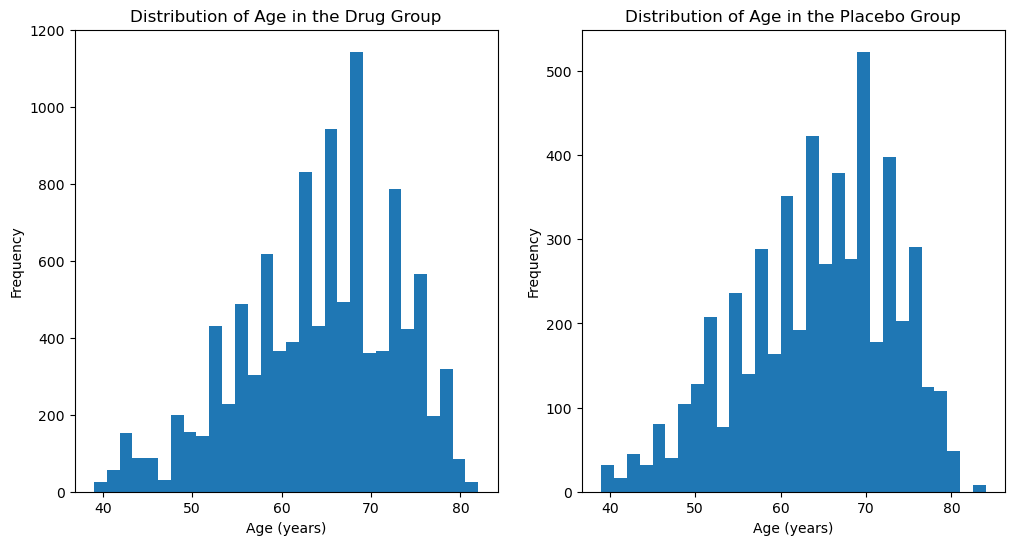

In [27]:
## The distribution of age in the Drug and Placebo groups 
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Set x and y axes labels 
xlabel= "Age (years)"
ylabel= "Frequency"

df_drug = drug_safety[drug_safety['trx'] == 'Drug']
df_placebo = drug_safety[drug_safety['trx'] == 'Placebo']
ax1.hist(df_drug['age'], bins=30, label='Drug group')
ax2.hist(df_placebo['age'], bins=30, label='Placebo group')
ax1.set_xlabel(xlabel)
ax2.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax2.set_ylabel(ylabel)
ax1.set_title('Distribution of Age in the Drug Group')
ax2.set_title('Distribution of Age in the Placebo Group')

In [28]:
# The Drug group's age distribution
ax1.hist(x="age", data=drug_safety[drug_safety["trx"] == "Drug"], bins=30)
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax1.set_title("Distribution of Age in the Drug Group")

Text(0.5, 1.0, 'Distribution of Age in the Drug Group')

In [29]:
# The Placebo group's age distribution
ax2.hist(x="age", data=drug_safety[drug_safety["trx"] == "Placebo"], bins=30)
ax2.set_xlabel(xlabel)
ax2.set_ylabel(ylabel)
ax2.set_title("Distribution of Age in the Placebo Group")

Text(0.5, 1.0, 'Distribution of Age in the Placebo Group')

According to the visualization, the distribution is not following normal distribution. Hence, it's better to use non-parametric test to check the whether there was a difference in age between the groups.

## Non-parametric test - Wicoxon-Main-Whitney test
As there are 2 samples and the data is unpaired, we will conduct a two-sided Wilcoxon-Main-Whitney test and round it to 3 decimal places. 
## Hypotheses
- Q: Was the age difference between the Drug and Place groups significant? 
- H0:  There is no significant difference in the median age between the Drug and Placebo groups.
    - H0: X_median_age_drug-X_median_age_placebo=0
- H1: The median age of the Drug group is significantly different from the median age of the Placebo group.
    - H1: X_median_age_drug-X_median_age_placebo>0

In [30]:
alpha = 0.05
age_drug=drug_safety.loc[drug_safety['trx'] == 'Drug', 'age']

In [31]:
age_placebo=drug_safety.loc[drug_safety['trx'] == 'Placebo', 'age']

In [34]:
two_samp_ind_results = pingouin.mwu(age_drug, age_placebo).round(3)
print(two_samp_ind_results)

          U-val alternative  p-val    RBC   CLES
MWU  29149339.5   two-sided  0.257 -0.011  0.505


The p value is 0.257 and it's greater than the significance level. Thus, we fail to reject the null hypothesis. That means there is no significant difference in median age between the Drug and Placebo groups. 